In [1]:
import pickle
import os
import numpy as np
import pylab
import io
from PIL import Image
from numpy import linalg as LA
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from pandas.testing import assert_frame_equal

In [6]:
first_caption = open('./演習第二/sorted_first.txt','rb')
first_caption = pickle.load(first_caption)
first_caption = pd.DataFrame(first_caption)
first_caption=first_caption.values

In [7]:
first_caption

array([['Woman in swim suit holding parasol on sunny day.'],
       ['A skate park next to a body of water and green park.'],
       ['A stop sign directs pedestrians as a train travels by.'],
       ...,
       ['A bunch of little kids wearing baseball uniforms and hats.'],
       ['Red and black photo of a woman with a baseball bat.'],
       ['two public transit buses parked in a lot ']], dtype=object)

In [8]:
image_data=open('./feature.txt','rb')
image_load=pickle.load(image_data)
image_df = pd.DataFrame(image_load)

In [9]:
name_data=open('./names.txt','rb')
name_load=pickle.load(name_data)
name_df = pd.DataFrame(name_load)

In [10]:
word_data=open('./label_w2vfeature.txt','rb')
word_load=pickle.load(word_data)
word_df = pd.DataFrame(word_load)

In [11]:
sentence_data=open('./演習第二/s2v_sorted.txt','rb')
sentence_load=pickle.load(sentence_data)
sentence_df = pd.DataFrame(sentence_load)

In [11]:
image_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.000000,0.000000,0.004685,0.000000,0.000000,0.036426,0.013780,0.000915,0.084309,0.035822,...,0.047573,0.060589,0.063224,0.001284,0.091518,0.015746,0.034198,0.061071,0.013651,0.036816
1,0.027196,0.000000,0.043014,0.039376,0.074930,0.042380,0.012699,0.053023,0.000000,0.000000,...,0.030673,0.015484,0.034730,0.000000,0.008370,0.012531,0.000000,0.031925,0.068793,0.004927
2,0.000000,0.015604,0.003944,0.000000,0.003436,0.024914,0.000000,0.014383,0.006291,0.034602,...,0.017187,0.075896,0.110132,0.078373,0.000000,0.003711,0.089949,0.000000,0.021746,0.016110
3,0.017912,0.035930,0.000000,0.018024,0.037549,0.034663,0.000000,0.030827,0.000000,0.000000,...,0.010633,0.044580,0.003921,0.000000,0.017305,0.097572,0.075238,0.027324,0.033634,0.049583
4,0.052985,0.016883,0.000000,0.000000,0.012842,0.111501,0.001204,0.061720,0.013982,0.039602,...,0.041960,0.008182,0.008754,0.029614,0.041558,0.000000,0.021227,0.082774,0.012081,0.145552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.037940,0.000000,0.015565,0.020620,0.013811,0.019821,0.042905,0.023561,0.000000,0.020772,...,0.010356,0.002784,0.046706,0.000000,0.048389,0.020805,0.058638,0.023868,0.028482,0.026762
10679,0.034549,0.055177,0.075164,0.124826,0.002472,0.045547,0.019261,0.002231,0.000000,0.060398,...,0.082447,0.046202,0.000000,0.134093,0.039146,0.011226,0.059605,0.142944,0.019860,0.040150
10680,0.004186,0.000823,0.000000,0.000000,0.018609,0.058170,0.038985,0.128926,0.042802,0.029914,...,0.000000,0.026989,0.000000,0.017349,0.000000,0.016489,0.002815,0.069881,0.018354,0.102038
10681,0.000000,0.003175,0.004204,0.000000,0.017764,0.059543,0.086710,0.000000,0.047520,0.000000,...,0.017523,0.000000,0.032701,0.000000,0.013419,0.000000,0.000000,0.027754,0.019904,0.046096


In [12]:
sentence_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.016056,-0.006123,0.051779,0.038074,0.035759,0.014724,0.099928,0.020528,-0.104922,-0.024028,...,-0.099209,0.048387,-0.002476,-0.065173,0.009811,0.001669,-0.053111,-0.110251,-0.052347,0.123192
1,0.031490,-0.017710,0.005902,-0.027711,0.023486,0.013922,0.046355,-0.005347,0.037848,0.007745,...,0.044392,-0.016916,-0.073479,-0.031131,-0.119302,-0.006546,-0.051282,-0.024681,-0.008858,0.008347
2,0.004197,-0.031988,-0.012344,0.073834,0.036724,0.091713,0.065448,0.026555,-0.038952,-0.024859,...,0.043669,-0.051282,-0.065356,-0.051688,-0.034871,-0.029518,0.005428,0.087493,-0.007598,0.087389
3,0.017574,0.016580,-0.062491,0.061875,-0.007923,-0.005840,0.110107,0.067306,-0.019350,-0.006337,...,-0.017074,0.020844,0.012750,0.019584,0.009289,0.035053,-0.077717,-0.002266,0.004776,-0.072120
4,-0.002736,0.101389,-0.026603,-0.090254,0.027765,0.011046,0.078284,0.060599,0.056947,0.028087,...,0.080984,0.022483,-0.051841,0.061843,-0.044270,0.007390,-0.050635,0.037035,0.023384,-0.004388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.008905,0.041579,0.101025,0.050293,-0.010530,-0.027659,0.053801,-0.062953,-0.019333,-0.028280,...,-0.009032,-0.023353,0.072496,0.001262,-0.093469,-0.029610,-0.017236,-0.017058,-0.102015,0.047295
10679,-0.063603,0.020208,-0.018921,-0.079504,-0.098726,0.024402,0.076156,0.029969,0.010823,-0.008691,...,-0.054484,0.050053,0.034789,-0.027399,0.118147,-0.012454,-0.002840,-0.012345,-0.092640,0.041477
10680,0.026812,0.111891,-0.013548,-0.020131,0.106016,0.062196,0.001757,0.099332,0.044022,0.095968,...,-0.058459,-0.005946,-0.017447,0.020715,0.030623,-0.039035,-0.044339,0.046216,0.033892,0.002774
10681,-0.052148,0.072759,-0.064433,0.019484,0.022776,0.070669,-0.010288,0.097426,-0.002396,0.018090,...,-0.140530,-0.020486,-0.020951,-0.042033,-0.012234,0.069289,0.057361,-0.068625,-0.026491,0.053445


In [13]:
name_df

,0
0,COCO_train2014_000000000036.jpg
1,COCO_train2014_000000000109.jpg
2,COCO_train2014_000000000151.jpg
3,COCO_train2014_000000000260.jpg
4,COCO_train2014_000000000368.jpg
...,...
10678,COCO_train2014_000000581563.jpg
10679,COCO_train2014_000000581670.jpg
10680,COCO_train2014_000000581719.jpg
10681,COCO_train2014_000000581732.jpg


In [14]:
word_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0392,0.035095,0.047119,0.001099,-0.046448,-0.033142,-0.084473,-0.072876,-0.002991,-0.01236,...,-0.053467,0.083252,-0.032104,-0.072021,0.029633,-0.056763,-0.02504,0.033569,0.009277,0.093506
1,-0.106415,-0.092468,0.00824,0.046387,-0.062973,0.039978,-0.105713,0.190186,-0.113525,0.016907,...,-0.125488,0.091858,-0.095947,-0.014572,0.028748,-0.105957,0.002899,-0.045654,0.077515,-0.007141
2,0.005722,0.003723,-0.047241,0.163696,-0.075928,-0.057861,-0.126404,-0.014526,-0.022324,-0.043945,...,0.020941,0.040405,-0.154907,-0.092651,0.023071,-0.131592,-0.000684,0.001526,-0.010925,-0.006714
3,0.002823,0.008911,-0.03772,0.05188,-0.105164,-0.016113,-0.088745,0.068344,-0.059814,-0.042114,...,0.032532,0.013184,-0.03418,-0.083496,0.018188,-0.088013,-0.022354,-0.047455,-0.064575,0.056061
4,-0.002792,0.022461,0.021729,0.028687,-0.0354,-0.025024,-0.033691,-0.007935,-0.015381,-0.015381,...,0.032471,0.024414,-0.02478,-0.05542,0.028442,-0.034668,0.00206,-0.026733,-0.004028,0.037598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-0.021591,-0.0271,-0.011475,0.089722,-0.034904,0.002563,-0.068848,-0.019592,-0.018707,0.009155,...,0.087891,0.026611,-0.086548,-0.062866,-0.004517,-0.084717,0.009872,-0.02243,-0.020386,0.034897
10679,0.000595,-0.078831,-0.009552,0.188324,-0.054871,-0.121399,-0.019714,0.068726,0.037292,-0.034212,...,0.06662,0.03492,-0.110718,-0.182398,0.08429,-0.000458,-0.224258,0.056458,0.064514,0.159775
10680,-0.002792,0.022461,0.021729,0.028687,-0.0354,-0.025024,-0.033691,-0.007935,-0.015381,-0.015381,...,0.032471,0.024414,-0.02478,-0.05542,0.028442,-0.034668,0.00206,-0.026733,-0.004028,0.037598
10681,-0.006088,0.025269,-0.001129,0.134888,-0.051025,-0.021713,-0.029907,0.03006,-0.002808,-0.048157,...,0.160645,0.058105,-0.017456,-0.108521,0.12561,-0.067871,-0.031845,0.014961,0.016815,0.051025


In [13]:
image_samples=image_df.values 
name_samples=name_df.values
word_samples=word_df.values
sentence_samples=sentence_df.values

In [14]:
sentence_samples

array([[-0.01605616, -0.0061226 ,  0.05177852, ..., -0.11025096,
        -0.05234743,  0.12319237],
       [ 0.03148998, -0.01771014,  0.00590218, ..., -0.02468069,
        -0.00885773,  0.00834679],
       [ 0.00419657, -0.03198775, -0.0123438 , ...,  0.08749264,
        -0.00759769,  0.08738934],
       ...,
       [ 0.02681228,  0.11189133, -0.01354778, ...,  0.04621552,
         0.03389219,  0.00277356],
       [-0.0521484 ,  0.07275944, -0.06443305, ..., -0.06862503,
        -0.02649058,  0.05344548],
       [ 0.078462  , -0.00636581,  0.01756014, ...,  0.09176163,
        -0.054756  ,  0.05241447]], dtype=float32)

In [15]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(sentence_samples)

In [16]:
Y_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(image_samples)

In [17]:
Z_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(word_samples)

(242,)


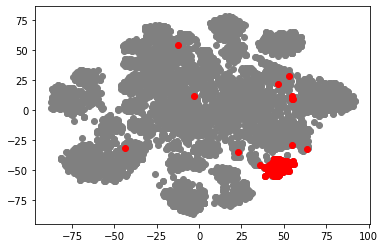

In [18]:
indices = [i for i, s in enumerate(first_caption[:,0]) if 'horse' in s]
print(np.shape(indices))
plt.scatter(X_embedded[:,0], X_embedded[:,1], color='gray')
plt.scatter(X_embedded[indices,0], X_embedded[indices,1], color='red')

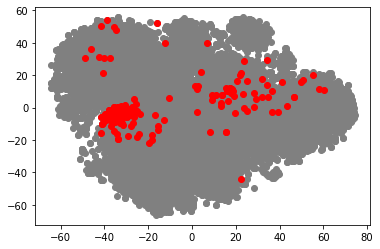

In [19]:
plt.scatter(Y_embedded[:,0], Y_embedded[:,1], color='gray')
plt.scatter(Y_embedded[indices,0], Y_embedded[indices,1], color='red')

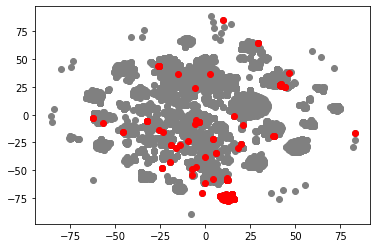

In [20]:
plt.scatter(Z_embedded[:,0], Z_embedded[:,1], color='gray')
plt.scatter(Z_embedded[indices,0], Z_embedded[indices,1], color='red')

In [21]:
kmeans=KMeans(n_clusters=80)

In [22]:
kmeans_image=KMeans(n_clusters=80)
kmeans_word = KMeans(n_clusters=100)

In [24]:
kmeans_image.fit(image_samples)

KMeans(n_clusters=80)

In [25]:
kmeans.fit(sentence_samples)

KMeans(n_clusters=80)

In [26]:
kmeans_word.fit(word_samples)

KMeans(n_clusters=100)

In [27]:
sentence_label=kmeans.predict(sentence_samples)
#print(sentence_label, name_df[sentence_label==0] )

In [28]:
print(sentence_label[indices])
sentence_horse = sentence_label[indices]

[10 10 10 10 10 72 10 10 10 10 10 46 46 46 46 10 46 10 46 10 46 46 46 10
 46 46 10 46 46 10 10 46 10 74 46 46 10 46 10 46 10 16 46 34 10 10 10 46
 10 10 10 10 46 46 10 34 46 46 46 46 46 10 46 10 46 46 46 46 46 46 46 10
 46 10 10 10 46 46 46 10 46 46 10 10 46 46 46 10 46 10 10 46 46 46 60 10
 46 10 46 10 46 46 10 10 46 10 10 10 10 10 10 10 10 46 10 10 10 46 10 46
 10 10 46 46 79 10 46 10 46 46 10 10 46 46 46 46 63 46 46 10 10 46 46 46
 46 46 46 46 46 46 46 46 46 10 46 10 46 64 10 46 46 10 10 46 46 46 10 10
 46 46 46 10 46 46 34 46 46 46 46 46 10 46 10 46 10 46 46 46 46 46 46 46
 46 46 46 10 10 46 46 46 10 46 10 10 79 46 46 46 46 46 46 10 46 63 10 46
 10 46 46 10 10 46 10 10 10 46 46 10 46 46 46 10 46 10 10 10 10 46 46 46
 10 46]


In [29]:
image_label=kmeans_image.predict(image_samples)
print(image_label[indices])
image_horse = image_label[indices]

[39  6 11 34 36  3 79 39 75 59 39 75 54 75 39 72 75 75 67 39 75 75 15 67
 75 30 75 67 75  9 15  9 64 64 75 75 75 75 39 39 75 75 71 63 27 75 67  7
 75 75 31 75 75 42 39 67  5 39  9  6 75 39 75 39 75 75 75 75 64 75 55 75
 39 39 75 75 75 48 75 39 75 54 67 31 75 39 75 75 75 75 39 72 75 37 56 54
 28 39 54 75 75 75 15 39 64 75 75 76 39 75 36 54 75 75 15 75 75 15 75 15
 39 67 75 39  6  9 75 75 75  6 75 75 55 45 67 39 72 67 39 15 75 75 75 64
 39 75  9 39 46 75 75 75 72 75 54  9  7 54  6 75 75 15 75 39 75 75 75  9
 75  9 75 76 54 75 63 39 39 55  9 75 31 75 75 75 53  5 75  5 67 75 33 39
 75 54 75 75 75 34 75 39 75 39 34 15 67 75 75 75 75 39 15 39  5 36 48 75
 75 75  9 31 75 75 39 75 39  5 75  9 39 39 75 75 75 34 10 53 75 75 75 72
 37 75]


In [30]:
word_label=kmeans_word.predict(word_samples)
print(word_label[indices])
word_horse = word_label[indices]

[23 23 23 23 23 10  9 23 23 23 23  9 23 23 23 81 23 23 23 65 23 23 23 61
 23 23 23 23  9 23 81 23 23 23 23 23 23 23 23 23 23 58 23 30 17 23 23 17
 23 23 23  9 23 23  9 20  7 17 84  9 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 32 23 23 73 48 23 23 23 23 23 23 23 23 23 23 23 23
 74 73 23 23 23 23 23 23 23 23 73 23 23 88 23 23 23 23 63 23 70 23 12 23
 23 17 23 23 23 23 23 23 23 23 62 23 23 23 23 23 23 23 62 23 23 23  9 23
 23 23 23 69 23 23  7 23 23 23 23 23 23 53 23 23 23 23 23 23 17 23 17 23
 23 23 23 48  9 23 17 23  9 23  7 23 23 23 23 23 23 23 23 23 17 17 23  7
 23 23 23 23 81 23 23 35 23 23 23 35 23 23  9 23 23 30  7 73 23 17 23 23
 23 23 23 17 23 23 81 23 17 23 23 23  7 78 23 23 23 23 17 51 23 23 23  9
 23 23]


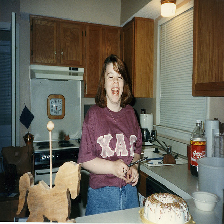

In [3]:
img = Image.open("./images/COCO_train2014_000000054294.jpg")
img = img.convert('RGB')
img = img.resize((224,224), Image.NEAREST)
img

In [31]:
heatmap_list = []

In [32]:
for i in range(80):
    for j in range(100):
        IoU = len(set(name_df[image_label==i].index.tolist())&set(name_df[word_label==j].index.tolist()))/len(set(name_df[image_label==i].index.tolist())|set(name_df[word_label==j].index.tolist()))
        IoU = IoU * 100
        heatmap_list.append(IoU)

In [33]:
heatmap_list = np.array(heatmap_list).reshape(80,100)
heatmap_list

array([[0.        , 0.        , 0.625     , ..., 1.47783251, 0.        ,
        2.77777778],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25445293, 0.        , 0.        , ..., 0.52631579, 0.625     ,
        2.40963855],
       ...,
       [0.21786492, 1.35501355, 0.        , ..., 3.62903226, 1.33928571,
        0.        ],
       [0.27472527, 7.30769231, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26954178, 0.        , 0.        , ..., 0.        , 2.20588235,
        1.36986301]])

In [34]:
heatmap_list.max()

41.2751677852349

In [35]:
heatmap2_list = []
for i in range(80):
    for j in range(80):
        IoU = len(set(name_df[image_label==i].index.tolist())&set(name_df[sentence_label==j].index.tolist()))/len(set(name_df[image_label==i].index.tolist())|set(name_df[sentence_label==j].index.tolist()))
        IoU = IoU * 100
        heatmap2_list.append(IoU)
heatmap2_list = np.array(heatmap2_list).reshape(80,80)
heatmap2_list

array([[0.        , 0.        , 0.43859649, ..., 1.6194332 , 0.        ,
        0.        ],
       [0.4       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.70671378],
       [0.        , 0.        , 0.46948357, ..., 0.        , 0.        ,
        0.7751938 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.68350168, 1.171875  ,
        0.        ],
       [0.        , 3.515625  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.49253731, 0.        , 0.        , ..., 0.        , 0.        ,
        3.47826087]])

In [50]:
heatmap_list[13][19]

41.2751677852349

In [53]:
heatmap2_list[56][45]

39.37823834196891

In [36]:
heatmap2_list.max()

39.37823834196891

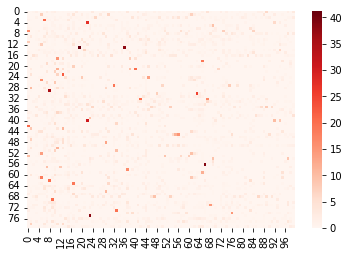

<Figure size 480000x320000 with 0 Axes>

In [37]:
df = pd.DataFrame(heatmap_list)
sns.heatmap(df,cmap='Reds')
plt.figure(dpi = 80000)
plt.show()

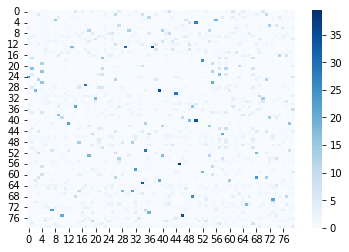

<Figure size 480000x320000 with 0 Axes>

In [38]:
df2 = pd.DataFrame(heatmap2_list)
sns.heatmap(df2,cmap='Blues')
plt.figure(dpi = 80000)
plt.show()

In [52]:
np.argmax(heatmap2_list)
print(4525//80,4525%80)

56 45


In [ ]:
heatmap2_list[56][45]

In [54]:
print(word_label, name_df[image_label==56] )

[32 69 63 ... 10 11  5]                                      0
94     COCO_train2014_000000005736.jpg
167    COCO_train2014_000000010342.jpg
181    COCO_train2014_000000011231.jpg
318    COCO_train2014_000000017712.jpg
506    COCO_train2014_000000027513.jpg
...                                ...
10245  COCO_train2014_000000558851.jpg
10293  COCO_train2014_000000561101.jpg
10301  COCO_train2014_000000561551.jpg
10450  COCO_train2014_000000569017.jpg
10607  COCO_train2014_000000577582.jpg

[111 rows x 1 columns]


In [56]:
print(word_label, name_df[sentence_label==45] )

[32 69 63 ... 10 11  5]                                      0
94     COCO_train2014_000000005736.jpg
181    COCO_train2014_000000011231.jpg
318    COCO_train2014_000000017712.jpg
721    COCO_train2014_000000039113.jpg
726    COCO_train2014_000000039359.jpg
...                                ...
10340  COCO_train2014_000000563488.jpg
10354  COCO_train2014_000000564226.jpg
10450  COCO_train2014_000000569017.jpg
10472  COCO_train2014_000000570430.jpg
10607  COCO_train2014_000000577582.jpg

[158 rows x 1 columns]


In [62]:
resultdf = sentence_df[sentence_label==45]
first_caption[94]

array(['A small boat in the blue open water.'], dtype=object)

In [63]:
first_caption[resultdf.index.values]

array([['A small boat in the blue open water.'],
       ['TWO PEOPLE ON A BOAT IN A RIVER.'],
       ['there is a small boat out on the lake '],
       ['A woman standing next to a child and a boat.'],
       ['A yellow boat sailing on a body of water next to a large clock and buildings.'],
       ['A MAN GETTING PULLED FROM A BOAT IN THE WATER '],
       ['a small boat that has some people on it'],
       ['a man waterskiing behind a boat on the lake '],
       ['a splash tour ride is moving through the water '],
       ['A black and white photo of multiple sail boats on the water. '],
       ['Many small wooden boats grouped together in the water.'],
       [' A man taking a picture of himself in front of rowboats on a lake.'],
       ['A man riding a boat on a river surrounded by green plants.'],
       ['A harbor filled with small white boats floating on water.'],
       ['Three women and a girl on a dock near the water.'],
       ['A group of people walking across a bridge off of 

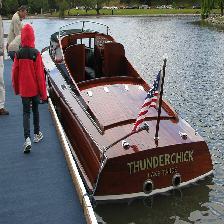

In [20]:
img = Image.open("./images/COCO_train2014_000000570430.jpg")
img = img.convert('RGB')
img = img.resize((224,224), Image.NEAREST)
img

22 10:00 am